In [ ]:
kstest:
    p_value > 0.05 : Alternate hypothesis
    p_value < 0.05 / 5% : Null-hypotehsis. (Data is normally distributed)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [7]:
array1= np.random.randint(10,100,size=20)
array1

array([85, 63, 66, 69, 11, 76, 85, 73, 22, 72, 67, 57, 61, 75, 21, 89, 48,
       39, 42, 77])

In [8]:
array2=array1.copy()
array2[10] = 200
array2[12] = 250
print(array1,array2)

[85 63 66 69 11 76 85 73 22 72 67 57 61 75 21 89 48 39 42 77] [ 85  63  66  69  11  76  85  73  22  72 200  57 250  75  21  89  48  39
  42  77]


<AxesSubplot:ylabel='Density'>

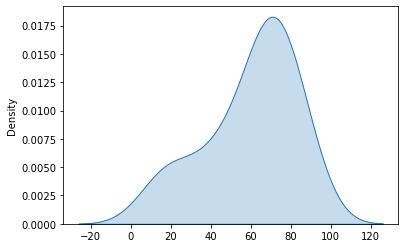

In [9]:
sns.kdeplot(array1,fill=True)

In [10]:
from scipy.stats import shapiro
_,p_value=shapiro(array1)
print('p value is', p_value)
if p_value > 0.05:print('normally distributed')
else:print('not normally distibuted')

p value is 0.059625037014484406
normally distributed


<AxesSubplot:ylabel='Density'>

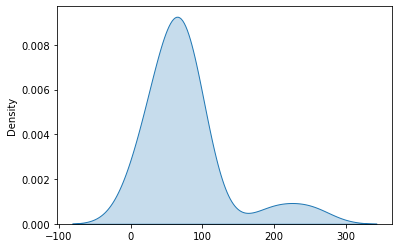

In [11]:
sns.kdeplot(array2,fill=True)

In [13]:
from scipy.stats import shapiro
_,p_value=shapiro(array2)
print('p value is', p_value)
if p_value > 0.05:print('normally distributed')
else:print('not normally distibuted')

p value is 0.00014475060743279755
not normally distibuted


### Estimating outliers using Z-Score Normalization / Standardization
```
z-score = (X_value - X_mean)/std

```

```Idea is calculating z_score & setting up a thresold such that all the datapoints above the thresold are outliers & can be eleiminated ```

In [ ]:
###### The standard value of thresold varies from 2-3.

In [15]:
mean = np.mean(array1)
std = np.std(array1)
print('mean is: ',mean,'std is: ',std)

outliers_list=[]
thresold = 3
for x_val in array1:
    z_score = (x_val-mean)/std
    z_score= np.abs(z_score)
    
    if z_score >= thresold:
        outliers_list.append(x_val)
   
outliers_list

mean is:  59.9 std is:  21.94743720802044


[]

In [32]:
mean = np.mean(array2)
std = np.std(array2)
print('mean is: ',mean,'std is: ',std)

outliers_list=[]
thresold = 2
for x_val in array2:
    z_score = (x_val-mean)/std
    z_score= np.abs(z_score)
    
    print(z_score, 'for x value >>', x_val)
    if z_score >= thresold:
        outliers_list.append(x_val)
   
outliers_list

mean is:  76.0 std is:  54.84706008529536
0.16409266031768444 for x value >> 85
0.23702273156998863 for x value >> 63
0.1823251781307605 for x value >> 66
0.12762762469153233 for x value >> 69
1.185113657849943 for x value >> 11
0.0 for x value >> 76
0.16409266031768444 for x value >> 85
0.05469755343922814 for x value >> 73
0.9845559619061066 for x value >> 22
0.07293007125230419 for x value >> 72
2.26083220882143 for x value >> 200
0.3464178384484449 for x value >> 57
3.1724580994752323 for x value >> 250
0.018232517813076048 for x value >> 75
1.0027884797191826 for x value >> 21
0.23702273156998863 for x value >> 89
0.5105104987661293 for x value >> 48
0.6746031590838137 for x value >> 39
0.6199056056445856 for x value >> 42
0.018232517813076048 for x value >> 77


[200, 250]

In [28]:
array2

array([ 85,  63,  66,  69,  11,  76,  85,  73,  22,  72, 200,  57, 250,
        75,  21,  89,  48,  39,  42,  77])

In [44]:
array3=list(array2.copy())


In [45]:
for i in array2:
    if i in outliers_list:
        array3.remove(i)
        

In [46]:
fil_mean=np.mean(array3)

59.44444444444444

In [58]:
array2=np.where(array2>=min(outliers_list),fil_mean,array2)
array2

array([85.        , 63.        , 66.        , 69.        , 11.        ,
       76.        , 85.        , 73.        , 22.        , 72.        ,
       59.44444444, 57.        , 59.44444444, 75.        , 21.        ,
       89.        , 48.        , 39.        , 42.        , 77.        ])

<AxesSubplot:ylabel='Density'>

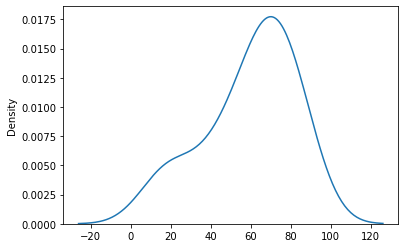

In [60]:
sns.kdeplot(array2)

In [61]:
from scipy.stats import shapiro
_,p_value=shapiro(array2)
print('p value is', p_value)
if p_value > 0.05:print('normally distributed')
else:print('not normally distibuted')

p value is 0.09645017981529236
normally distributed
